In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
dataset_path = '/Users/guruprasad/Desktop/metadata.csv'

In [3]:
dataset = pd.read_csv(dataset_path)

In [4]:


# Take a random sample of 10,000 rows
df = dataset.sample(n=10000, random_state=42)  # random_state for reproducibility

# Check the shape of the sampled data
print(f"Sampled data shape: {df.shape}")


Sampled data shape: (10000, 5)


In [5]:
df.head()

,videoname,original_width,original_height,label,original
90362,emajtqhmwe.mp4,129,129,FAKE,hfbonjhrcj.mp4
45280,vvtbwgpebl.mp4,89,89,FAKE,httluulakd.mp4
17768,ziletvhgfl.mp4,223,223,FAKE,qmqoprzuhw.mp4
10696,rlhlzbilbe.mp4,186,186,FAKE,txtzdfwgvx.mp4
23984,qithvzqhrd.mp4,108,107,FAKE,ucuoymuoyj.mp4


In [6]:
df.tail()

,videoname,original_width,original_height,label,original
57478,kdnopngcya.mp4,107,107,FAKE,iohuzwvefi.mp4
80555,llwjceyylu.mp4,108,108,FAKE,rhlojfgydd.mp4
52938,kxqxhviipl.mp4,186,185,FAKE,hgldvicfxk.mp4
83585,ddizdslzfv.mp4,186,186,FAKE,npufvmzddi.mp4
15236,yvidhwqrqd.mp4,107,107,REAL,NaN


In [7]:
df.shape

(10000, 5)

In [8]:
df.columns

Index(['videoname', 'original_width', 'original_height', 'label', 'original'], dtype='object')

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

videoname             0
original_width        0
original_height       0
label                 0
original           1706
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 90362 to 15236
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   videoname        10000 non-null  object
 1   original_width   10000 non-null  int64 
 2   original_height  10000 non-null  int64 
 3   label            10000 non-null  object
 4   original         8294 non-null   object
dtypes: int64(2), object(3)
memory usage: 468.8+ KB


In [12]:
df.nunique()

videoname          10000
original_width        26
original_height       28
label                  2
original            5962
dtype: int64

In [13]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['videoname', 'label', 'original'], dtype='object')

Numerical type columns:
Index(['original_width', 'original_height'], dtype='object')


In [14]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [15]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [16]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['label']
Non-Categorical Features: ['videoname', 'original']
Discrete Features: []
Continuous Features: ['original_width', 'original_height']


In [17]:
df = df.fillna("Not Available")

In [18]:
for i in categorical:
    print(i,':', df[i].unique())
    print()

label : ['FAKE' 'REAL']



In [19]:
for i in categorical:
    print(df[i].value_counts())
    print()

label
FAKE    8294
REAL    1706
Name: count, dtype: int64



In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
import warnings
warnings.filterwarnings('ignore')

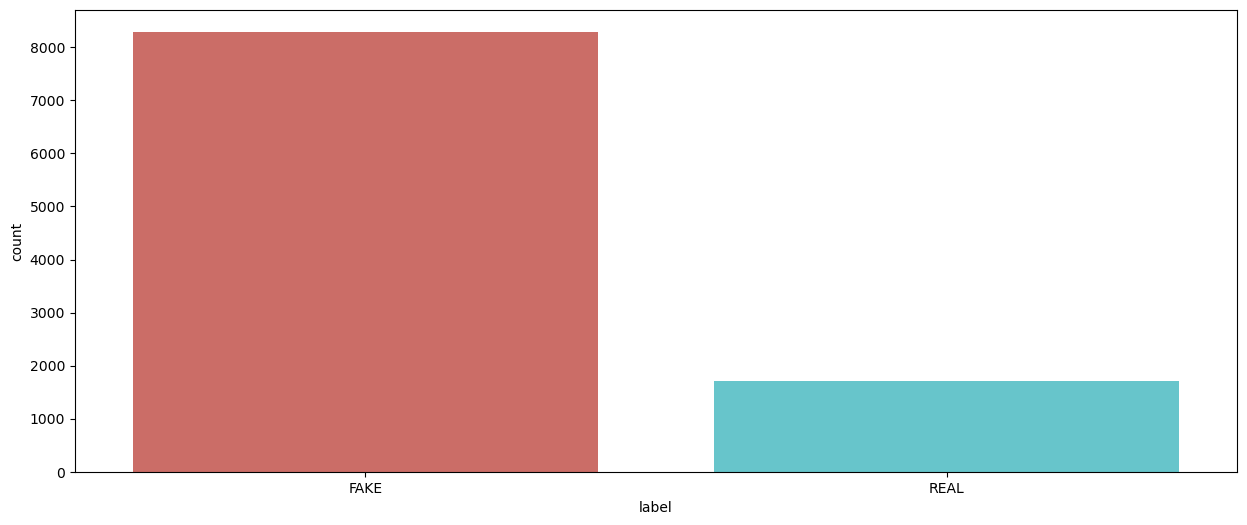

In [22]:
for i in categorical:
    plt.figure(figsize=(15,6))
    sns.countplot(x = df[i], data = df, palette = 'hls')
    plt.show()

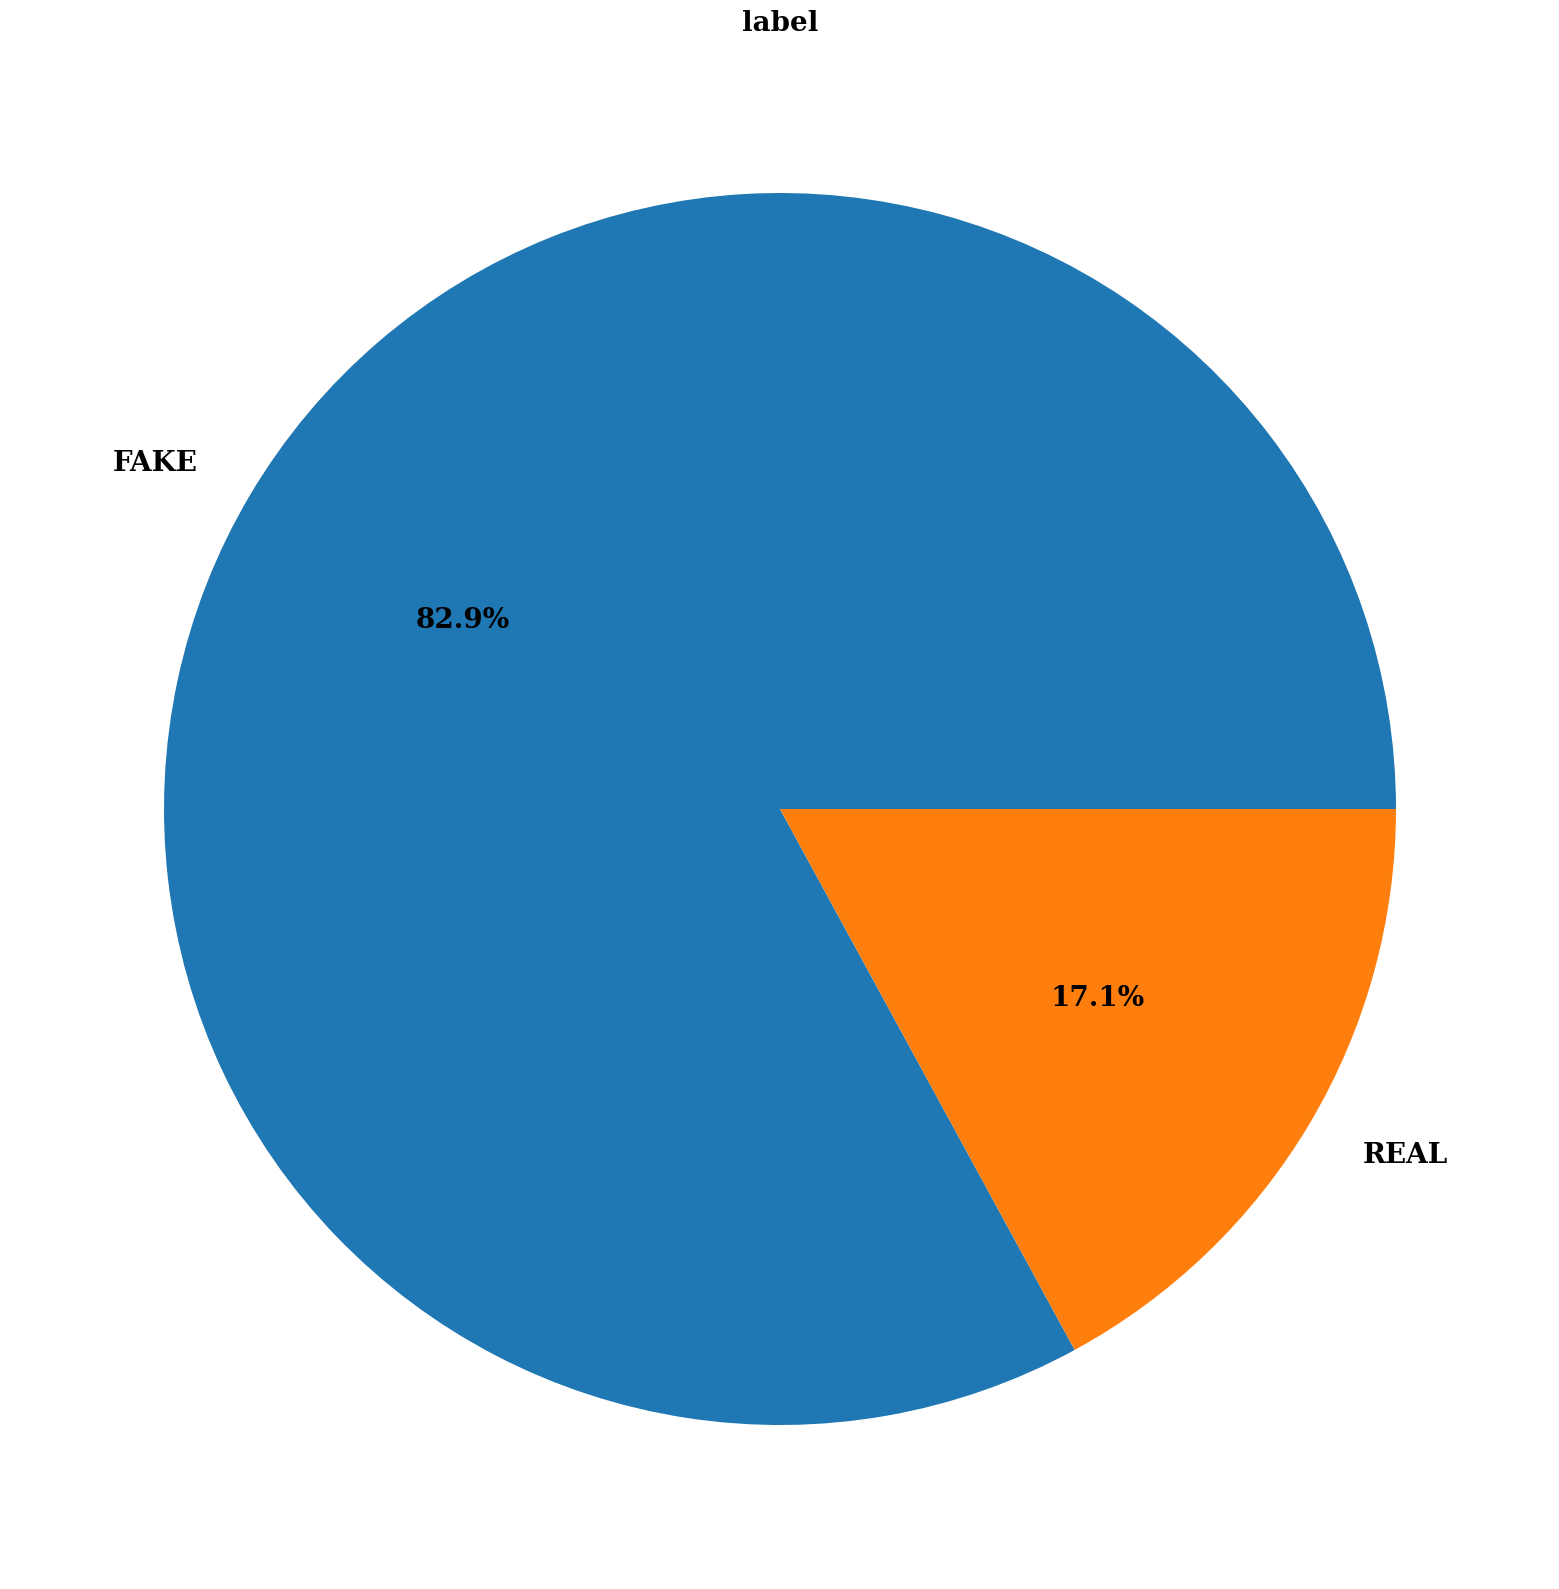

In [23]:
for i in categorical:
    plt.figure(figsize=(30,20))
    plt.pie(df[i].value_counts(), labels=df[i].value_counts().index,
            autopct='%1.1f%%', textprops={ 'fontsize': 20,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
    hfont = {'fontname':'serif', 'weight': 'bold'}
    plt.title(i, size=20, **hfont)
    plt.show()

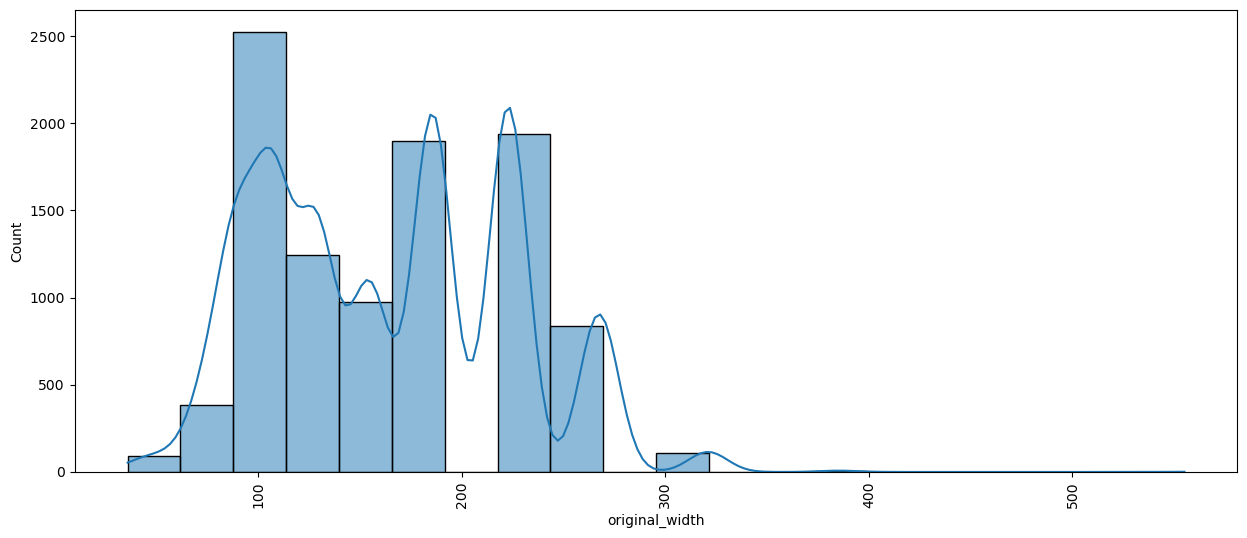

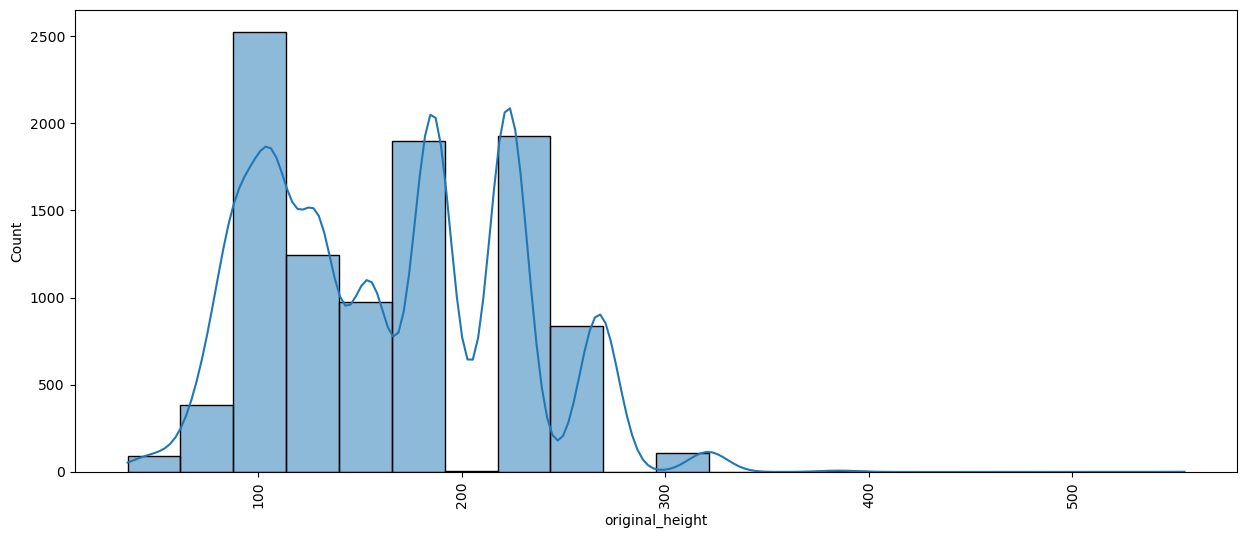

In [24]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], kde = True, bins = 20, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

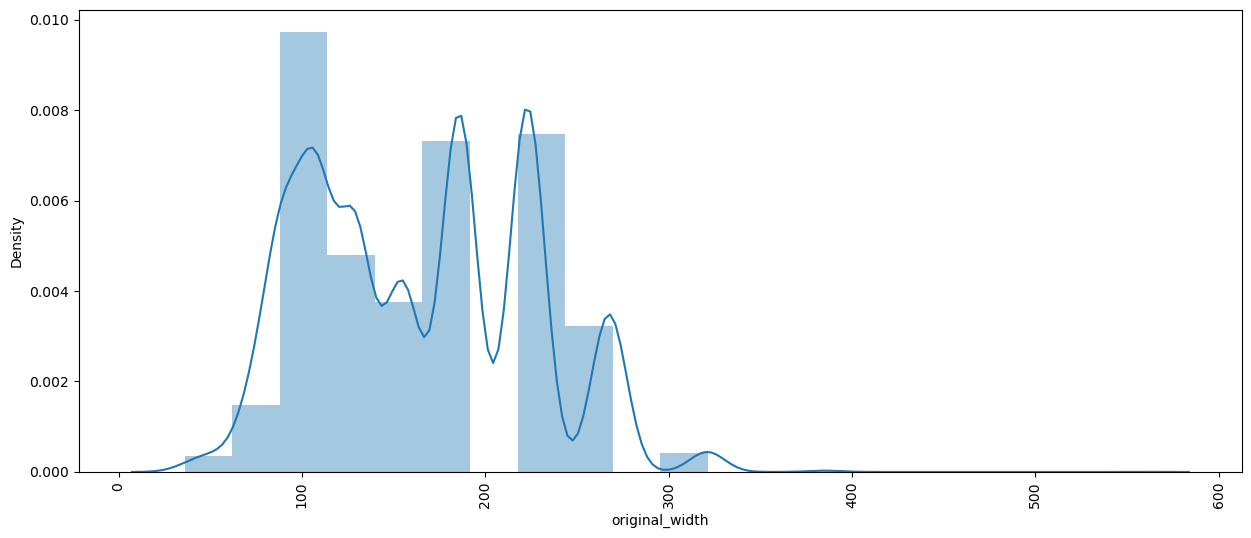

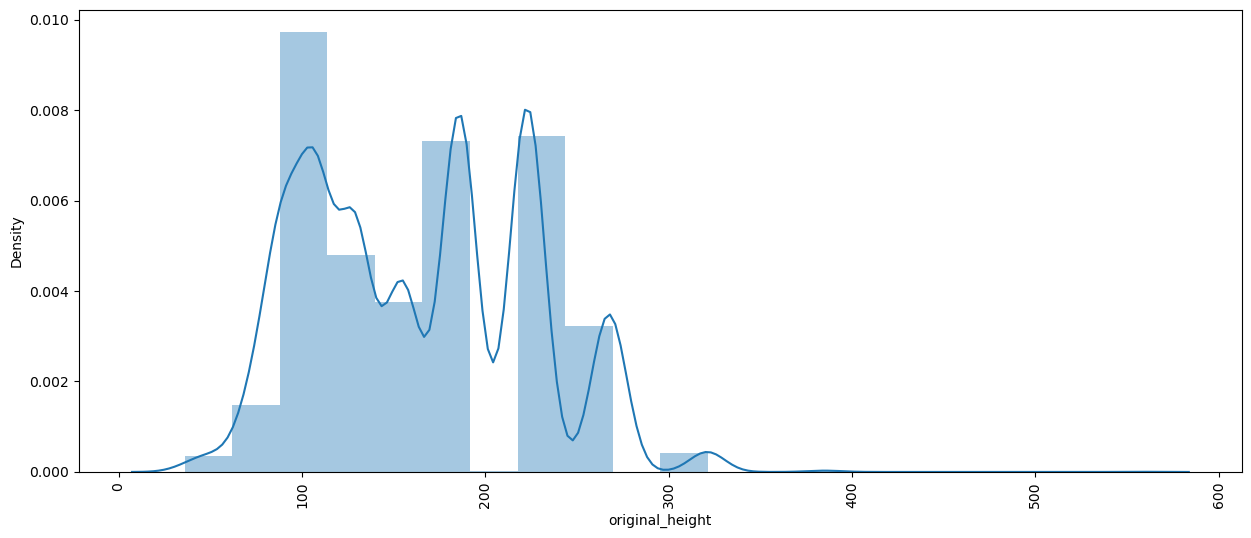

In [25]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], kde = True, bins = 20)
    plt.xticks(rotation = 90)
    plt.show()

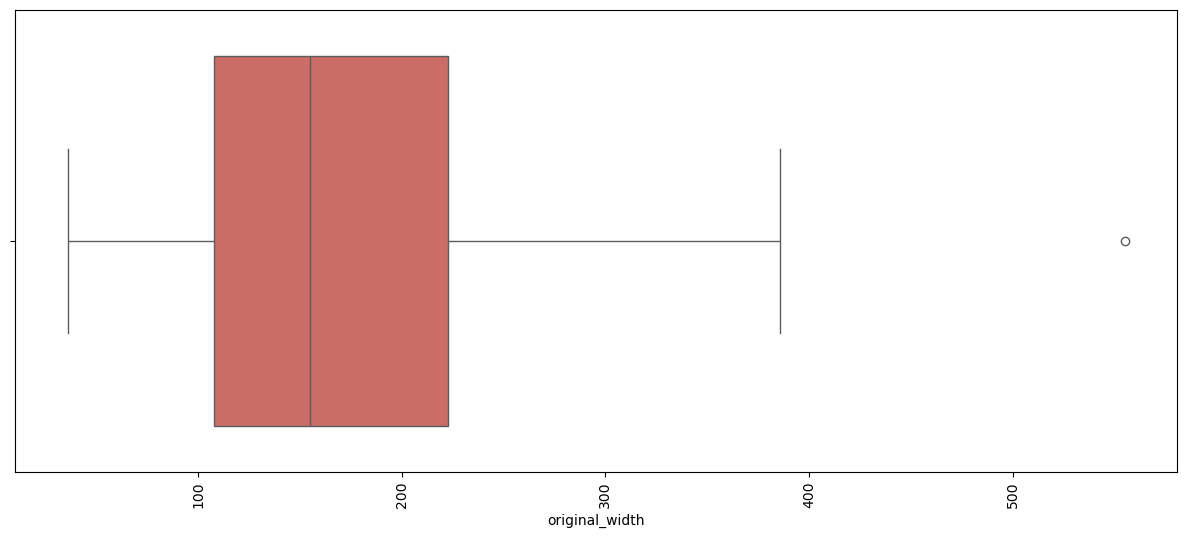

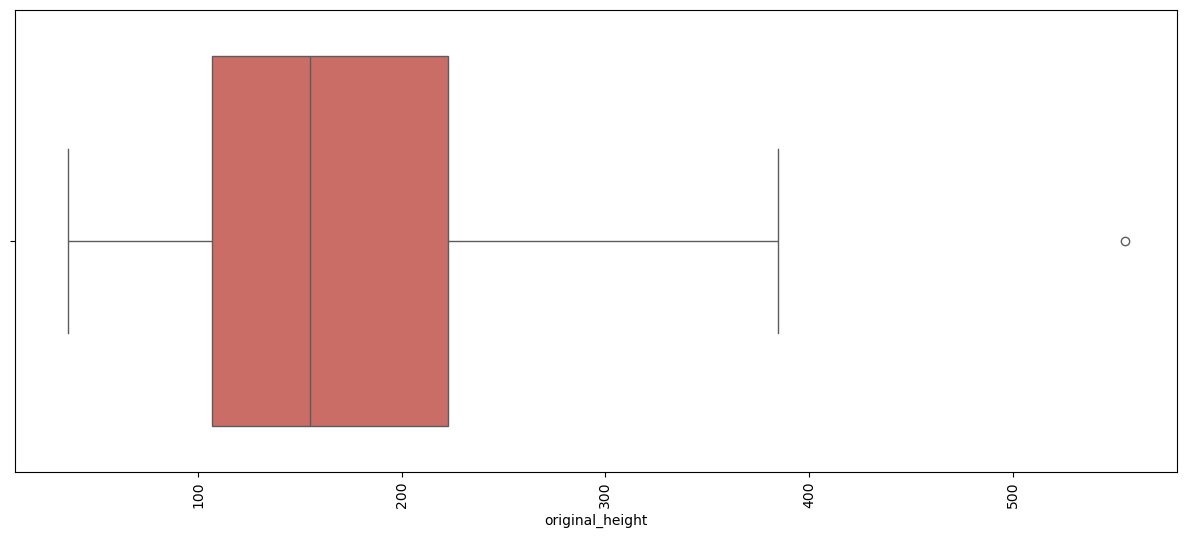

In [26]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(x = df[i],data = df, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()


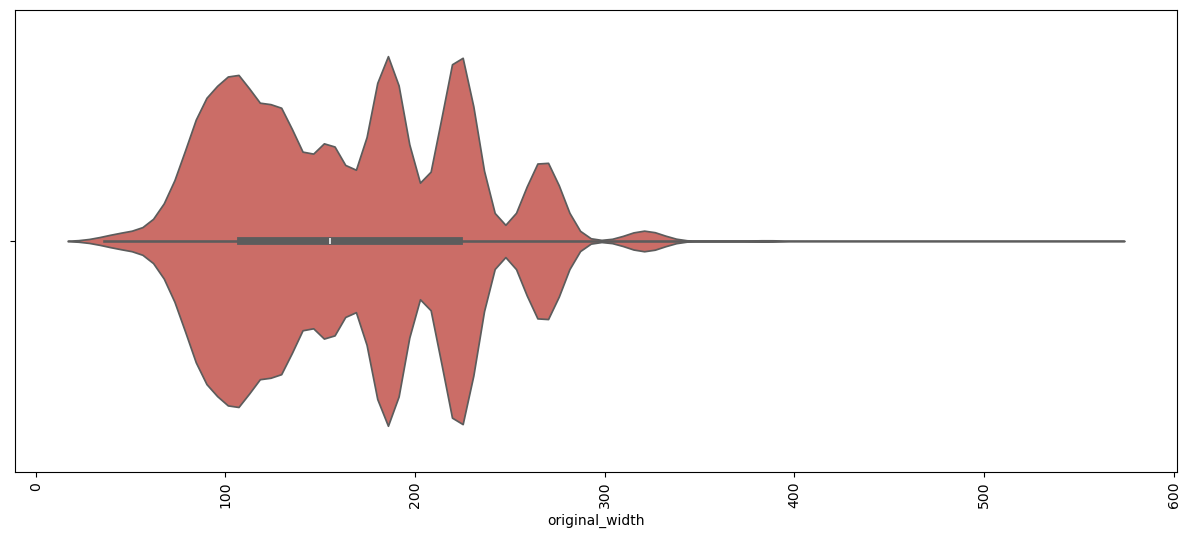

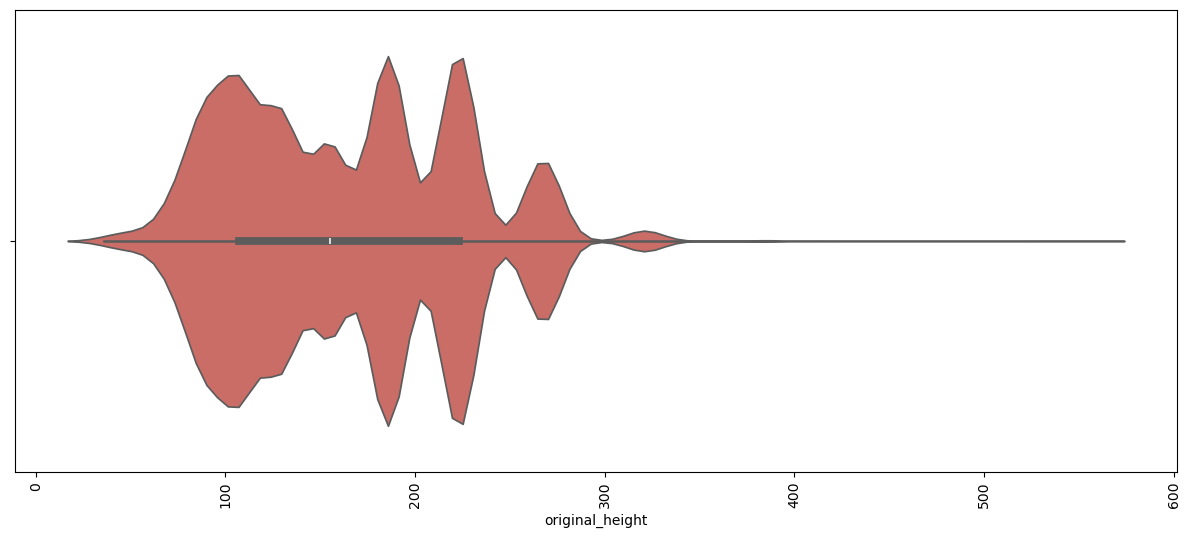

In [27]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.violinplot(x = df[i],data = df, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

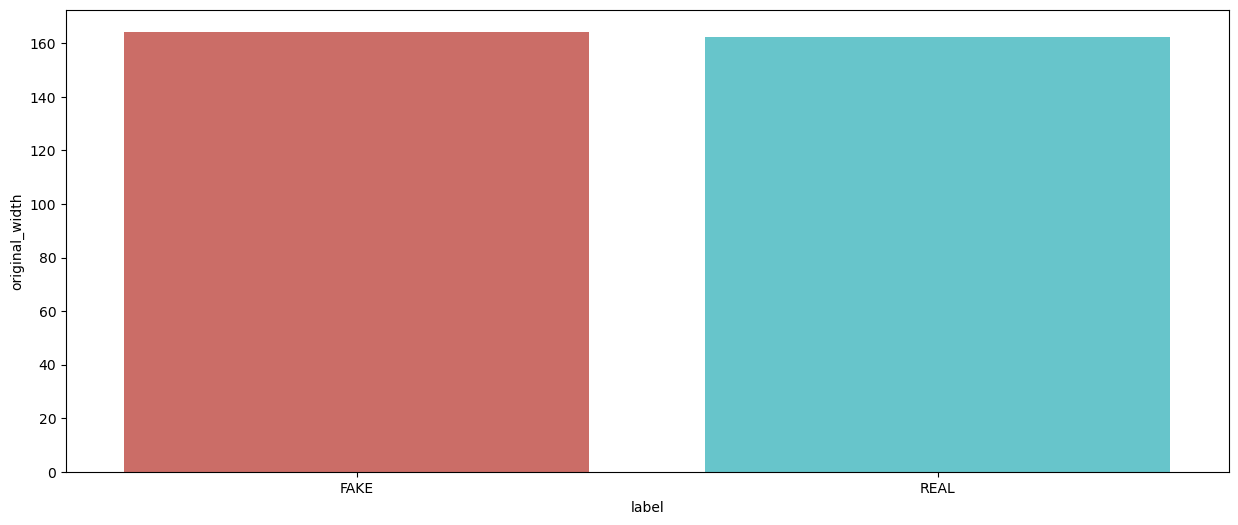

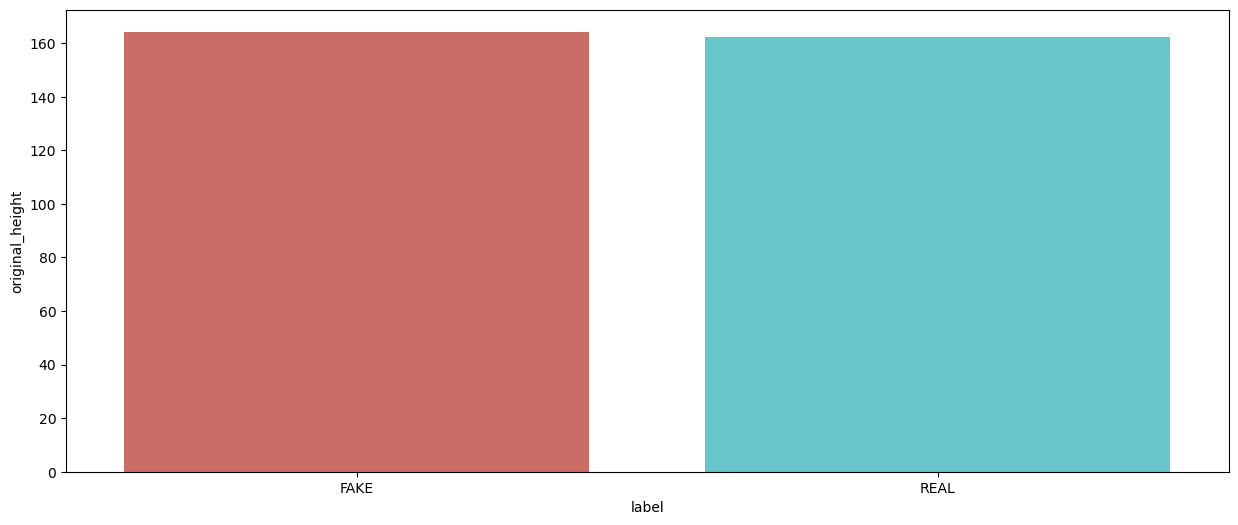

In [28]:
for i in categorical:
    for j in numerical_columns:
        plt.figure(figsize=(15,6))
        sns.barplot(x = df[i], y = df[j], data = df, ci = None, palette = 'hls')
        plt.show()

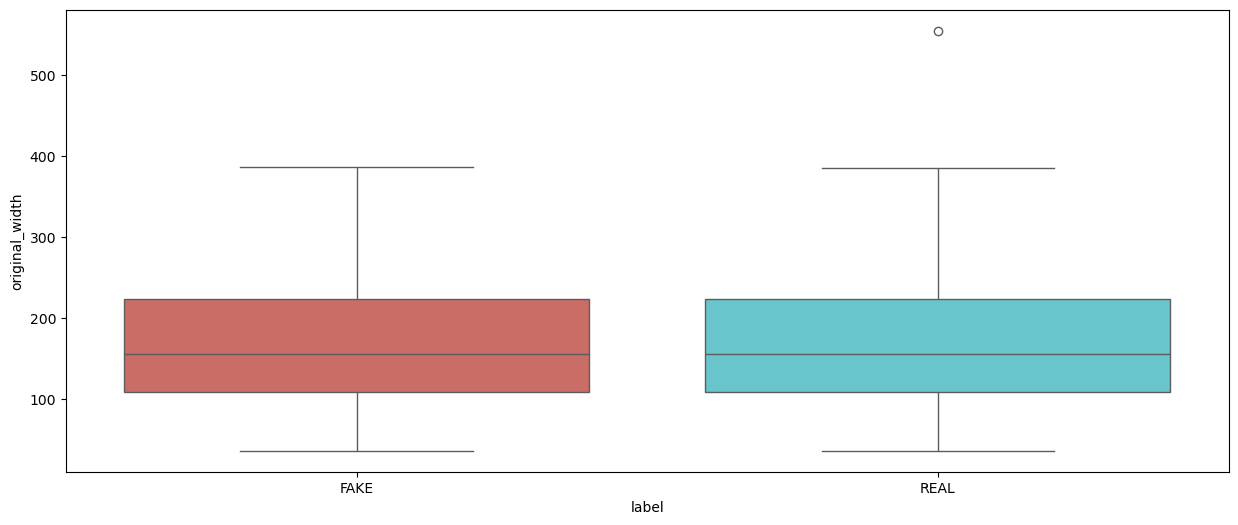

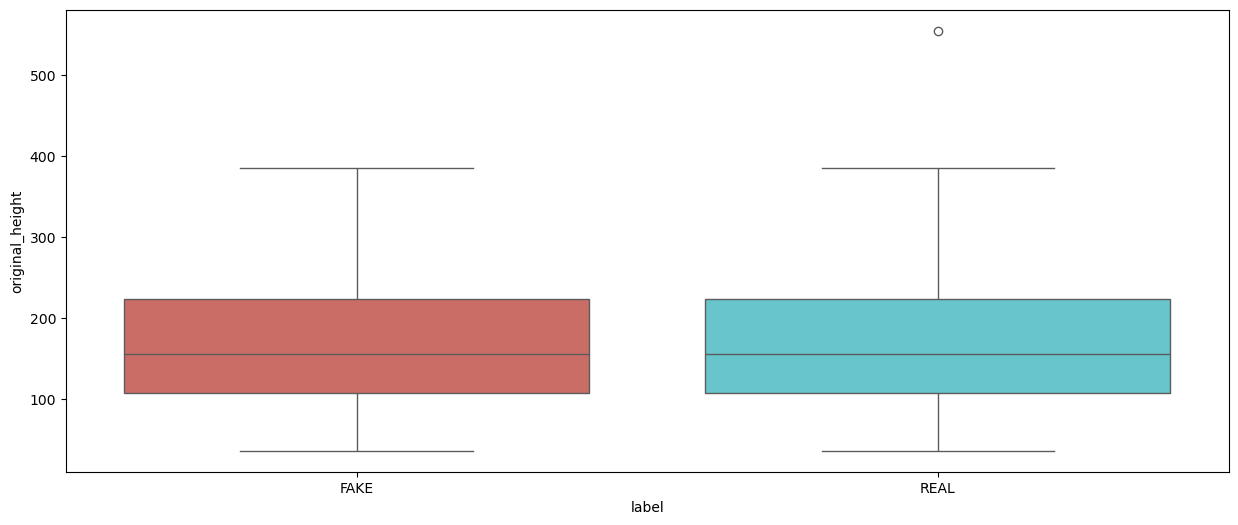

In [29]:
for i in categorical:
    for j in numerical_columns:
        plt.figure(figsize=(15,6))
        sns.boxplot(x = df[i], y = df[j], data = df, palette = 'hls')
        plt.show()

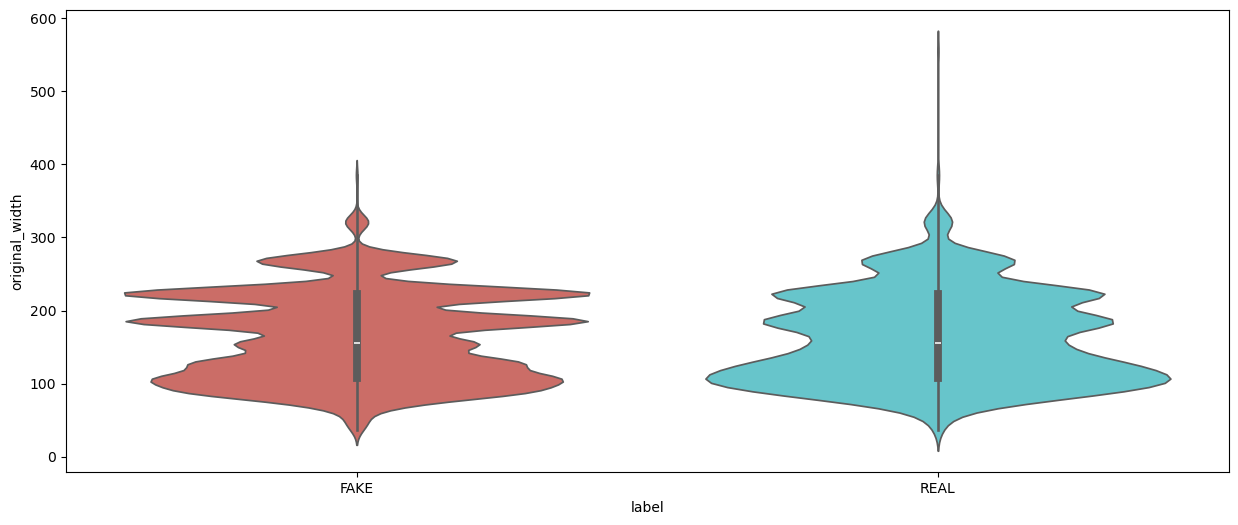

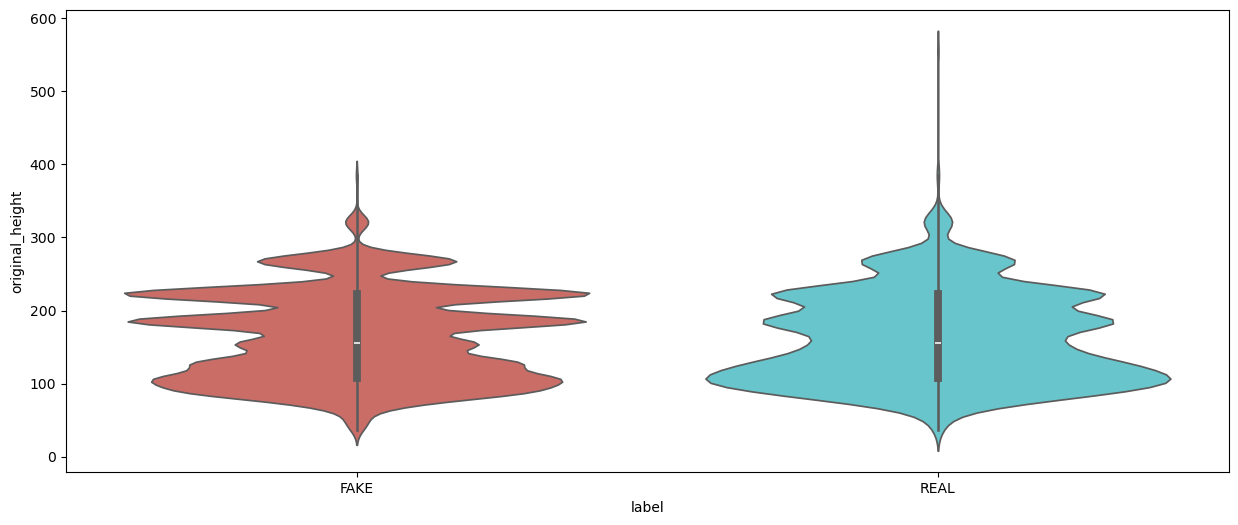

In [30]:
for i in categorical:
    for j in numerical_columns:
        plt.figure(figsize=(15,6))
        sns.violinplot(x = df[i], y = df[j], data = df, palette = 'hls')
        plt.show()

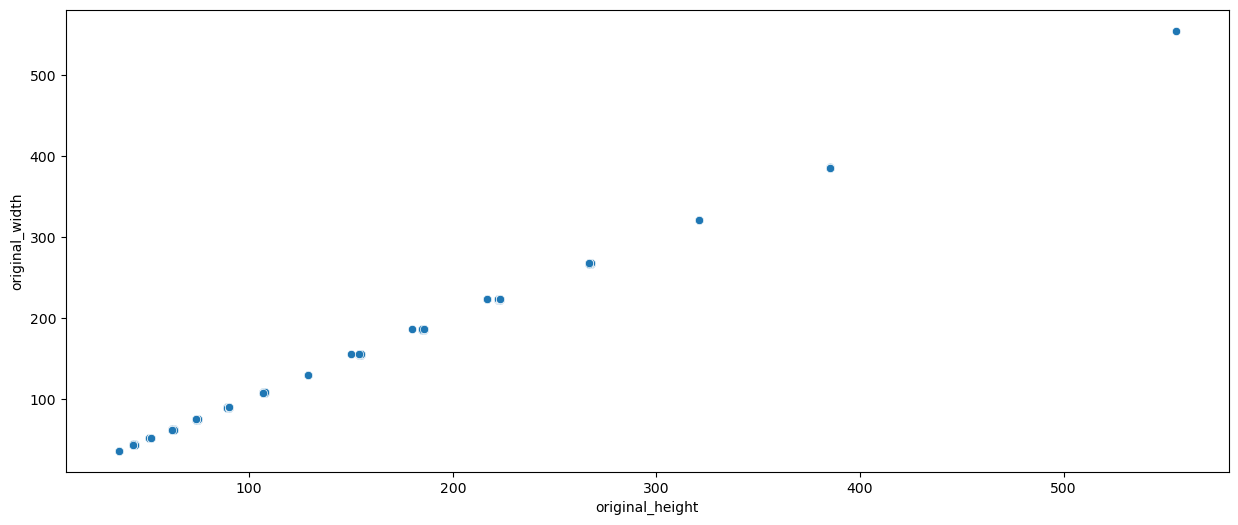

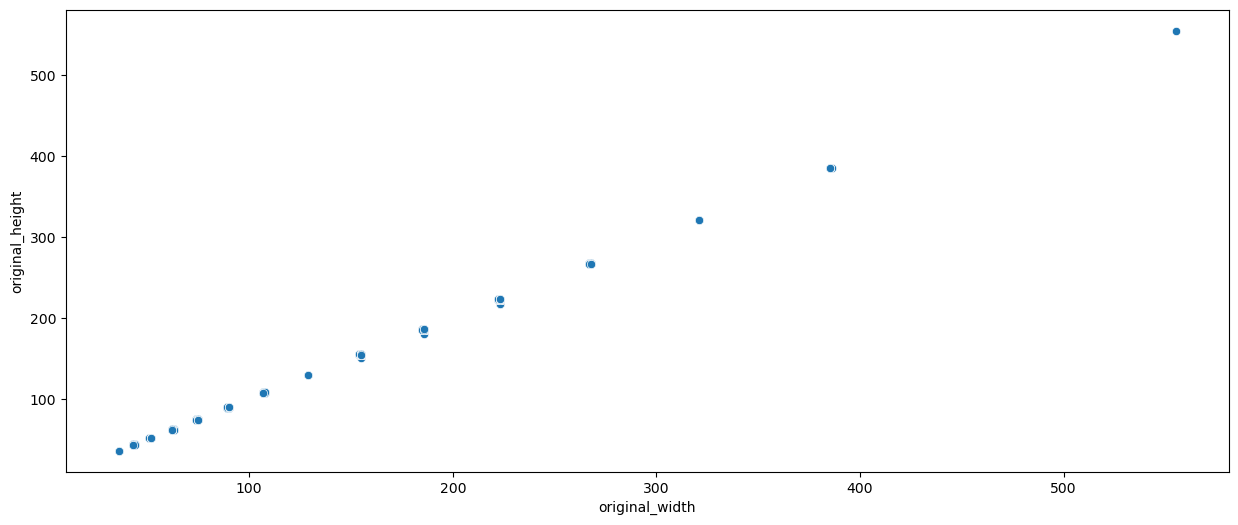

In [31]:
for i in numerical_columns:
    for j in numerical_columns:
        if i != j:
            plt.figure(figsize=(15,6))
            sns.scatterplot(x = df[j], y = df[i], data = df, palette = 'hls')
            plt.show()

In [32]:
real_df = df[df["label"] == "REAL"]
fake_df = df[df["label"] == "FAKE"]
sample_meta = pd.concat([real_df, fake_df])

In [33]:
from sklearn.model_selection import train_test_split

# Assuming sample_meta is a DataFrame with your data
# Limit to 10,000 samples
limited_sample_meta = sample_meta.sample(n=min(10000, len(sample_meta)), random_state=42)

# Split the data into training and test sets (80% train, 20% test)
Train_set, Test_set = train_test_split(
    limited_sample_meta,
    test_size=0.2,
    random_state=42,
    stratify=limited_sample_meta['label']
)

# Further split the training set into training and validation sets (70% train, 30% val of the train set)
Train_set, Val_set = train_test_split(
    Train_set,
    test_size=0.3,
    random_state=42,
    stratify=Train_set['label']
)

# Print the number of samples in each set
print(f"Total training samples: {len(Train_set)}")
print(f"Total validation samples: {len(Val_set)}")
print(f"Total test samples: {len(Test_set)}")


Total training samples: 5600
Total validation samples: 2400
Total test samples: 2000


In [34]:
Train_set.shape,Val_set.shape,Test_set.shape

((5600, 5), (2400, 5), (2000, 5))

In [35]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


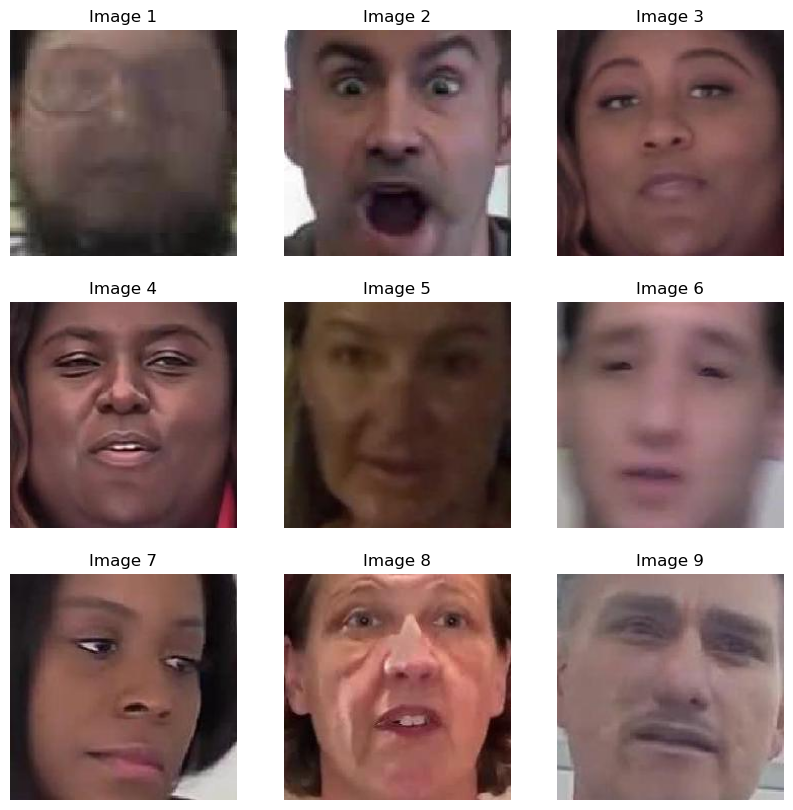

In [36]:
import cv2
import os
import matplotlib.pyplot as plt

# Your existing code here

image_path = '/Users/guruprasad/Downloads/faces_224'

image_files = os.listdir(image_path)

image_files.sort()

selected_images = image_files[:9]

plt.figure(figsize=(10, 10))

for index, image_file in enumerate(selected_images):
    image = cv2.imread(os.path.join(image_path, image_file))

    plt.subplot(3, 3, index + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Image {index + 1}')
    plt.axis('off')

plt.show()

In [37]:
for i, image_file in enumerate(image_files[:10]):
    image = cv2.imread(os.path.join(image_path, image_file))
    if image is not None:
        height, width, _ = image.shape
        print(f"Resolution of image {i+1}: {width} x {height}")
    else:
        print(f"Error reading image {i+1}")

if len(image_files) < 10:
    print(f"Only {len(image_files)} images found in the directory.")

Resolution of image 1: 224 x 224
Resolution of image 2: 224 x 224
Resolution of image 3: 224 x 224
Resolution of image 4: 224 x 224
Resolution of image 5: 224 x 224
Resolution of image 6: 224 x 224
Resolution of image 7: 224 x 224
Resolution of image 8: 224 x 224
Resolution of image 9: 224 x 224
Resolution of image 10: 224 x 224


Image file not found: /content/faces_images/gcoyyxhxrw.jpg
Image file not found: /content/faces_images/sbfmvdmxhh.jpg
Image file not found: /content/faces_images/ktwrnrnmhl.jpg
Image file not found: /content/faces_images/jkmhvprjrl.jpg
Image file not found: /content/faces_images/oofdvzymxr.jpg
Image file not found: /content/faces_images/yxaojguzig.jpg
Image file not found: /content/faces_images/xkmmrmxwde.jpg
Image file not found: /content/faces_images/aeepmwyhkk.jpg
Image file not found: /content/faces_images/gpeefwttrv.jpg
Image file not found: /content/faces_images/miltxpsvmr.jpg
Image file not found: /content/faces_images/yjusuvaxzk.jpg
Image file not found: /content/faces_images/aknbdpmgua.jpg
Image file not found: /content/faces_images/mvdqlootwv.jpg
Image file not found: /content/faces_images/rckvyynmuw.jpg
Image file not found: /content/faces_images/uyizpqbaxn.jpg
Image file not found: /content/faces_images/awnirdhpua.jpg
Image file not found: /content/faces_images/fitrowlltn.j

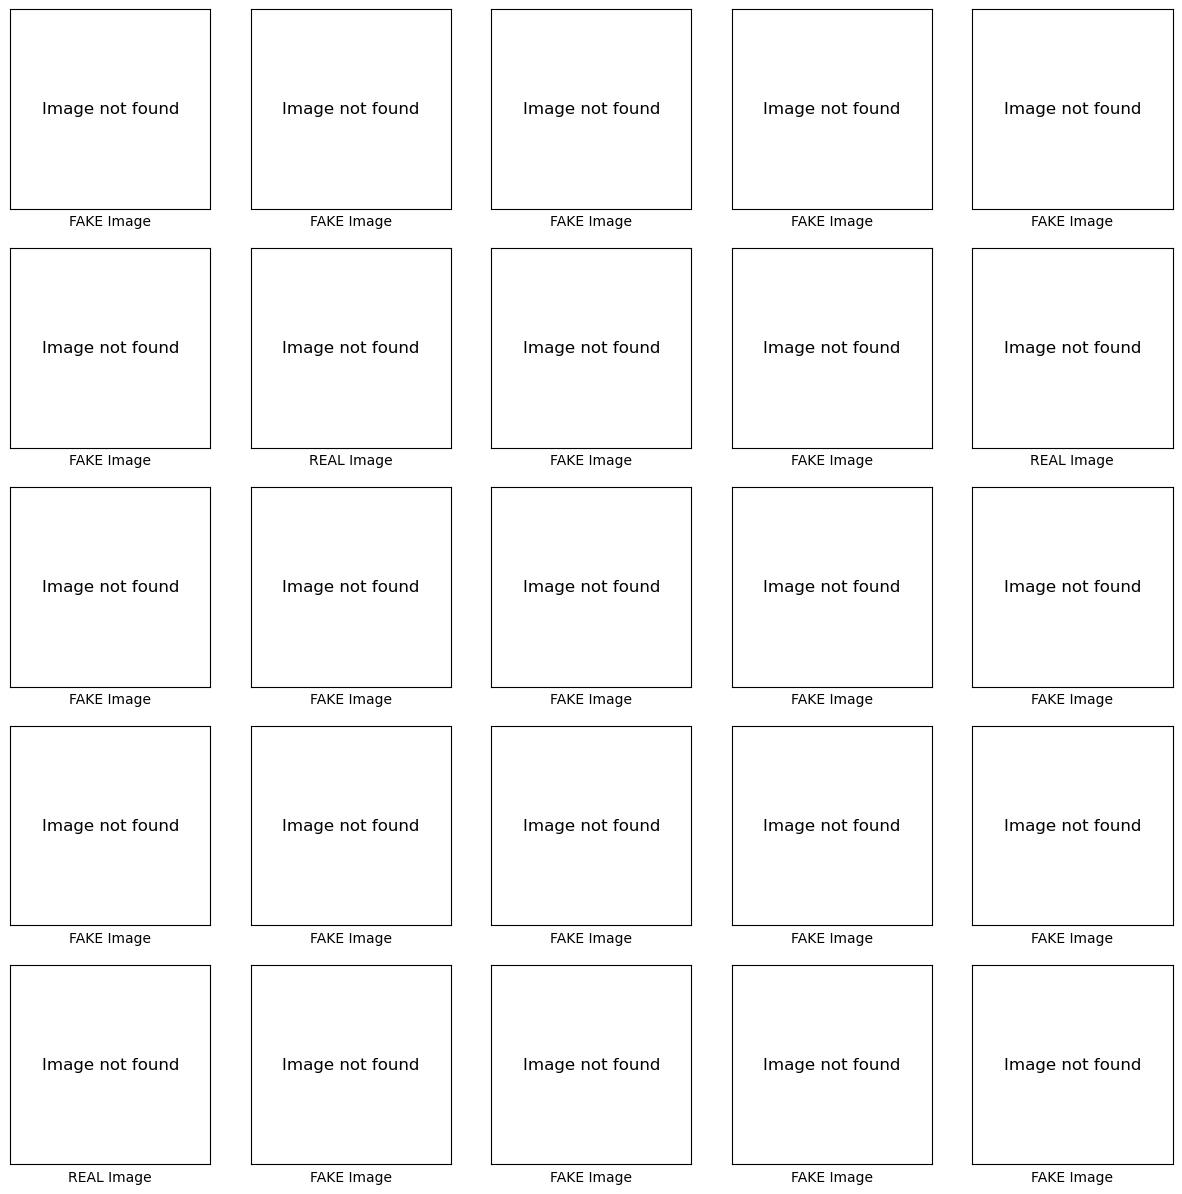

In [38]:
import os
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for cur, i in enumerate(Train_set.index[25:50]):
    plt.subplot(5, 5, cur + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Construct the image path
    image_path = os.path.join('/content/faces_images', Train_set.loc[i, 'videoname'][:-4] + '.jpg')

    # Check if the file exists
    if os.path.exists(image_path):
        image = cv2.imread(image_path)
        if image is not None:  # Check if image was loaded successfully
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        else:
            print(f"Error reading image: {image_path}")
            plt.text(0.5, 0.5, "Image not found", ha='center', va='center', fontsize=12)
    else:
        print(f"Image file not found: {image_path}")
        plt.text(0.5, 0.5, "Image not found", ha='center', va='center', fontsize=12)

    if Train_set.loc[i, 'label'] == 'FAKE':
        plt.xlabel('FAKE Image')
    else:
        plt.xlabel('REAL Image')

plt.show()

In [39]:
# linkcode  # This might have been intended as a comment
def retreive_dataset(set_name):
    images,labels=[],[]
    for (img, imclass) in zip(set_name['videoname'], set_name['label']):
        images.append(cv2.imread('/content/faces_images'+img[:-4]+'.jpg'))
        if(imclass=='FAKE'):
            labels.append(1)
        else:
            labels.append(0)

    return np.array(images),np.array(labels)

In [40]:

X_train,y_train=retreive_dataset(Train_set)
X_val,y_val=retreive_dataset(Val_set)
X_test,y_test=retreive_dataset(Test_set)

[ WARN:0@1.006] global loadsave.cpp:241 findDecoder imread_('/content/faces_imagesokhirwvpbw.jpg'): can't open/read file: check file path/integrity
[ WARN:0@1.006] global loadsave.cpp:241 findDecoder imread_('/content/faces_imagesmjqrqqutkc.jpg'): can't open/read file: check file path/integrity
[ WARN:0@1.006] global loadsave.cpp:241 findDecoder imread_('/content/faces_imageswquomaiagr.jpg'): can't open/read file: check file path/integrity
[ WARN:0@1.006] global loadsave.cpp:241 findDecoder imread_('/content/faces_imageslhwnchdcjc.jpg'): can't open/read file: check file path/integrity
[ WARN:0@1.007] global loadsave.cpp:241 findDecoder imread_('/content/faces_imagesmnftldewyt.jpg'): can't open/read file: check file path/integrity
[ WARN:0@1.007] global loadsave.cpp:241 findDecoder imread_('/content/faces_imagesjijydihvum.jpg'): can't open/read file: check file path/integrity
[ WARN:0@1.007] global loadsave.cpp:241 findDecoder imread_('/content/faces_imagesszghjhivxf.jpg'): can't open/r

In [41]:
pip install tensorflow


imread_('/content/faces_imagescsxvxmydax.jpg'): can't open/read file: check file path/integrity
[ WARN:0@1.115] global loadsave.cpp:241 findDecoder imread_('/content/faces_imagesnyborsczcr.jpg'): can't open/read file: check file path/integrity
[ WARN:0@1.115] global loadsave.cpp:241 findDecoder imread_('/content/faces_imageszshjbwvzdk.jpg'): can't open/read file: check file path/integrity
[ WARN:0@1.115] global loadsave.cpp:241 findDecoder imread_('/content/faces_imagessvlhzlaknf.jpg'): can't open/read file: check file path/integrity
[ WARN:0@1.115] global loadsave.cpp:241 findDecoder imread_('/content/faces_imagesjuivasplmg.jpg'): can't open/read file: check file path/integrity
[ WARN:0@1.115] global loadsave.cpp:241 findDecoder imread_('/content/faces_imagesiljopcgqtx.jpg'): can't open/read file: check file path/integrity
[ WARN:0@1.115] global loadsave.cpp:241 findDecoder imread_('/content/faces_imageshnetpruzii.jpg'): can't open/read file: check file path/integrity
[ WARN:0@1.115] 

Note: you may need to restart the kernel to use updated packages.


In [42]:
import tensorflow as tf
from tensorflow.keras import layers, models
from functools import partial

In [43]:
tf.random.set_seed(42)

In [44]:
DefaultConv2D = partial(layers.Conv2D, kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")

# Model Definition
model = models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[224, 224, 3]),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(units=128, activation="relu",
                 kernel_initializer="he_normal"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(units=64, activation="relu",
                 kernel_initializer="he_normal"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(units=1, activation="sigmoid")
])

In [45]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

In [46]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss="binary_crossentropy", metrics=["accuracy"])

In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 401408)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    51,380,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,621,121 (196.92 MB)

 Trainable params: 51,620,353 (196.92 MB)

 Non-trainable params: 768 (3.00 KB)

In [48]:
import os
import random

# Set the directory containing your images
image_dir = '/Users/guruprasad/Downloads/faces_224'  # Replace with your image directory

# Create a list to hold image paths
image_paths = []

# Loop through all files in the directory and limit to 10,000 images
for filename in os.listdir(image_dir):
    if (filename.endswith('.jpg') or filename.endswith('.png')):
        # Create the full path to the image
        full_path = os.path.join(image_dir, filename)
        image_paths.append(full_path)

    # Stop adding images if we reach 10,000
    if len(image_paths) >= 10000:
        break

# Shuffle the image paths
random.shuffle(image_paths)

# Split the data into training and validation sets
split_index = int(0.8 * len(image_paths))  # 80% for training, 20% for validation
image_paths_train = image_paths[:split_index]
image_paths_val = image_paths[split_index:]

# Print the number of images in each set
print(f"Total training images: {len(image_paths_train)}")
print(f"Total validation images: {len(image_paths_val)}")
import os
import random

# Set the directory containing your images
image_dir = '/Users/guruprasad/Downloads/faces_224'  # Replace with your image directory

# Create a list to hold image paths
image_paths = []

# Loop through all files in the directory and limit to 10,000 images
for filename in os.listdir(image_dir):
    if (filename.endswith('.jpg') or filename.endswith('.png')):
        # Create the full path to the image
        full_path = os.path.join(image_dir, filename)
        image_paths.append(full_path)

    # Stop adding images if we reach 10,000
    if len(image_paths) >= 10000:
        break

# Shuffle the image paths
random.shuffle(image_paths)

# Split the data into training and validation sets
split_index = int(0.8 * len(image_paths))  # 80% for training, 20% for validation
image_paths_train = image_paths[:split_index]
image_paths_val = image_paths[split_index:]

# Print the number of images in each set
print(f"Total training images: {len(image_paths_train)}")
print(f"Total validation images: {len(image_paths_val)}")
import os
import random

# Set the directory containing your images
image_dir = '/Users/guruprasad/Downloads/faces_224'  # Replace with your image directory

# Create a list to hold image paths
image_paths = []

# Loop through all files in the directory and limit to 10,000 images
for filename in os.listdir(image_dir):
    if (filename.endswith('.jpg') or filename.endswith('.png')):
        # Create the full path to the image
        full_path = os.path.join(image_dir, filename)
        image_paths.append(full_path)

    # Stop adding images if we reach 10,000
    if len(image_paths) >= 10000:
        break

# Shuffle the image paths
random.shuffle(image_paths)

# Split the data into training and validation sets
split_index = int(0.8 * len(image_paths))  # 80% for training, 20% for validation
image_paths_train = image_paths[:split_index]
image_paths_val = image_paths[split_index:]

# Print the number of images in each set
print(f"Total training images: {len(image_paths_train)}")
print(f"Total validation images: {len(image_paths_val)}")


Total training images: 8000
Total validation images: 2000
Total training images: 8000
Total validation images: 2000
Total training images: 8000
Total validation images: 2000


In [49]:
import cv2
import numpy as np

def load_and_preprocess_images(image_paths, target_size=(224, 224)):
    images = []
    for img_path in image_paths:
        img = cv2.imread(img_path)  # Read the image
        if img is None:  # If the image is not loaded
            continue
        img = cv2.resize(img, target_size)  # Resize to the target size
        img = img.astype(np.float32) / 255.0  # Normalize the pixel values to [0, 1]
        images.append(img)
    return np.array(images)

X_train = load_and_preprocess_images(image_paths_train)
X_val = load_and_preprocess_images(image_paths_val)


In [50]:
from tensorflow.keras import models, layers

def create_model():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D(),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')  # Use softmax for multi-class
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = create_model()


In [51]:
print(f"Total training samples: {len(Train_set)}")
print(f"Total validation samples: {len(Val_set)}")
print(f"Total test samples: {len(Test_set)}")

Total training samples: 5600
Total validation samples: 2400
Total test samples: 2000


In [52]:
X_train = X_train[:5600]  # Keep only the first 5,600 samples


In [53]:
y_train = y_train[:8000]  # Keep only the first 8,000 samples


In [54]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")


X_train shape: (5600, 224, 224, 3)
y_train shape: (5600,)


In [55]:
# Assuming you have already defined X_train, y_train, X_val, and y_val




# Adjust sizes if necessary
min_train_size = min(len(X_train), len(y_train))
X_train = X_train[:min_train_size]
y_train = y_train[:min_train_size]

min_val_size = min(len(X_val), len(y_val))
X_val = X_val[:min_val_size]
y_val = y_val[:min_val_size]


# Adjust y_val to match X_val size
y_val = y_val[:2000]  # Keep only the first 2,000 samples in y_val





In [57]:
history = model.fit(
    X_train,
    y_train,
    epochs=1,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

175/175 ━━━━━━━━━━━━━━━━━━━━ 284s 2s/step - accuracy: 0.6783 - loss: 0.6761 - val_accuracy: 0.8245 - val_loss: 0.4644


In [59]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')


63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 242ms/step - accuracy: 0.8189 - loss: 0.4753
Validation Loss: 0.46440646052360535, Validation Accuracy: 0.8245000243186951


In [60]:
predictions = model.predict(X_val)


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 244ms/step


In [61]:
# Generate predictions for training and validation sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)


175/175 ━━━━━━━━━━━━━━━━━━━━ 48s 272ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 253ms/step


In [65]:
# Convert probabilities to binary predictions
# Assuming binary classification with a threshold of 0.5
y_train_pred_binary = (y_train_pred > 0.5).astype(int)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

In [81]:
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score,confusion_matrix,classification_report


In [83]:
# Calculate metrics for training data
train_accuracy = accuracy_score(y_train, y_train_pred_binary)
train_f1 = f1_score(y_train, y_train_pred_binary)
train_precision = precision_score(y_train, y_train_pred_binary)
train_recall = recall_score(y_train, y_train_pred_binary)
train_conf_matrix = confusion_matrix(y_train, y_train_pred_binary)
train_class_report = classification_report(y_train, y_train_pred_binary)

In [85]:
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Training F1 Score: {train_f1:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print("Training Confusion Matrix:")
print(train_conf_matrix)
print("Training Classification Report:")
print(train_class_report)

Training Accuracy: 82.93%
Training F1 Score: 0.91
Training Precision: 0.83
Training Recall: 1.00
Training Confusion Matrix:
[[   0  956]
 [   0 4644]]
Training Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       956
           1       0.83      1.00      0.91      4644

    accuracy                           0.83      5600
   macro avg       0.41      0.50      0.45      5600
weighted avg       0.69      0.83      0.75      5600



In [87]:
# Calculate metrics for validation data
val_accuracy = accuracy_score(y_val, y_val_pred_binary)
val_f1 = f1_score(y_val, y_val_pred_binary)
val_precision = precision_score(y_val, y_val_pred_binary)
val_recall = recall_score(y_val, y_val_pred_binary)
val_conf_matrix = confusion_matrix(y_val, y_val_pred_binary)
val_class_report = classification_report(y_val, y_val_pred_binary)

In [89]:
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Validation F1 Score: {val_f1:.2f}")
print(f"Validation Precision: {val_precision:.2f}")
print(f"Validation Recall: {val_recall:.2f}")
print("Validation Confusion Matrix:")
print(val_conf_matrix)
print("Validation Classification Report:")
print(val_class_report)

Validation Accuracy: 82.45%
Validation F1 Score: 0.90
Validation Precision: 0.82
Validation Recall: 1.00
Validation Confusion Matrix:
[[   0  351]
 [   0 1649]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       351
           1       0.82      1.00      0.90      1649

    accuracy                           0.82      2000
   macro avg       0.41      0.50      0.45      2000
weighted avg       0.68      0.82      0.75      2000



In [93]:
test_accuracy = accuracy_score(y_test, y_val_pred_binary)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 82.95%


In [113]:
class_report = classification_report(y_test,y_val_pred_binary )
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       341
           1       0.83      1.00      0.91      1659

    accuracy                           0.83      2000
   macro avg       0.41      0.50      0.45      2000
weighted avg       0.69      0.83      0.75      2000



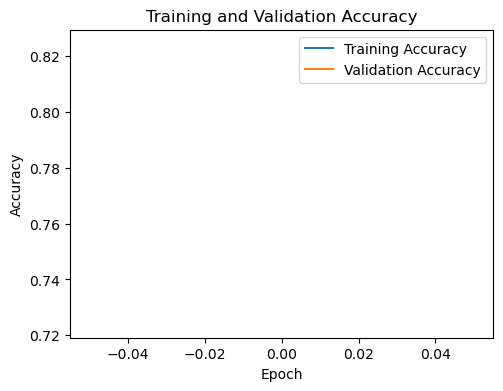

In [115]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

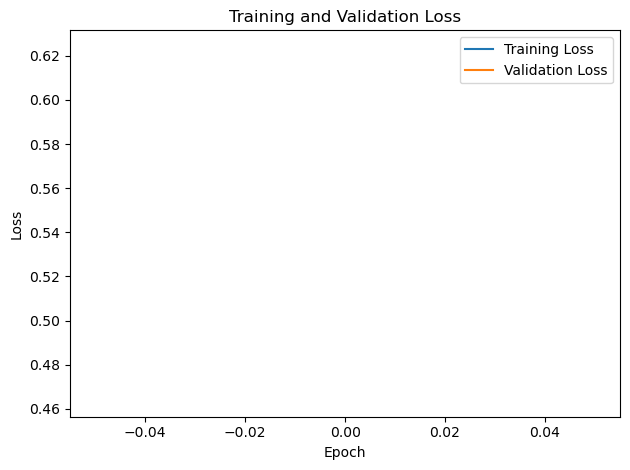

In [104]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()